<a href="https://colab.research.google.com/github/gemaramirez/HIGI2022/blob/main/python/Oscilador_armonico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

Solución analítica usando sympy tomada de https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html


In [4]:

sympy.init_printing()

m, k, x_0, xdot_0, omega_0, t = sympy.symbols('m, k, x_0, xdot_0, omega_0, t')
x = sympy.Function('x')

In [5]:
sol = sympy.dsolve(sympy.Derivative(x(t), t, 2) + omega_0**2 * x(t))
sol

In [6]:
ics = [sympy.Eq(sol.args[1].subs(t, 0), x_0), sympy.Eq(sol.args[1].diff(t).subs(t, 0), xdot_0)]


In [7]:
solved_ics = sympy.solve(ics)
solved_ics

In [8]:
full_sol = sol.subs(solved_ics[0])
full_sol

In [9]:
case1 = sympy.simplify(full_sol.subs({x_0:1, xdot_0:0, omega_0:2}))
case1


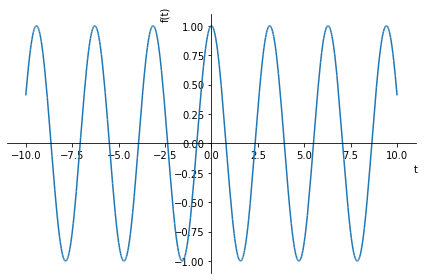

In [10]:
sympy.plot(case1.rhs)

In [11]:
case2 = sympy.simplify(full_sol.subs({x_0:0, xdot_0:1, omega_0:2}))
case2

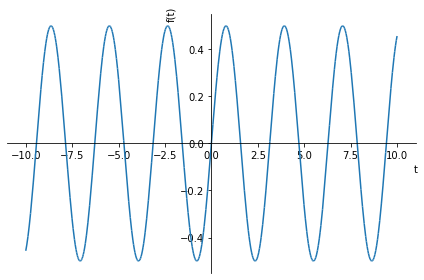

In [12]:
sympy.plot(case2.rhs)


Solución numerica usando el método de *Euler*

In [13]:
def euler(x0,v0,omega_0,t0=0,dt=0.01,nsteps=100):
  x=[x0]
  t=[t0]
  for i in range(1,nsteps):
    vi=v0-omega_0**2*x0*dt
    xi=x0+v0*dt
    x.append(xi)
    t.append(t0+dt*i)
    x0=xi
    v0=vi
  return x,t

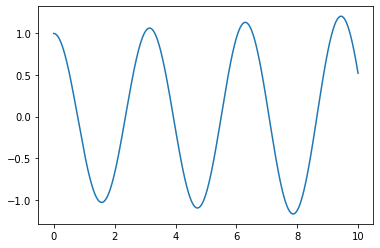

In [14]:
x,t=euler(1,0,2,nsteps=1000)
plt.plot(t,x)


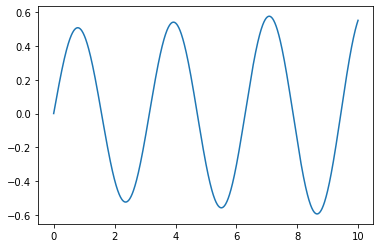

In [15]:
x,t=euler(0,1,2,nsteps=1000)
plt.plot(t,x)

Ejercicio: Revisa e implementa las otras opciones de solución numérica discutidas en https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

In [16]:
def euler(x0,v0,omega_0,t0=0,dt=0.01,nsteps=100):
  x=[x0]
  t=[t0]
  for i in range(1,nsteps):
    vi=v0-omega_0**2*np.sin(x0)*dt
    xi=x0+v0*dt
    x.append(xi)
    t.append(t0+dt*i)
    x0=xi
    v0=vi
  return x,t

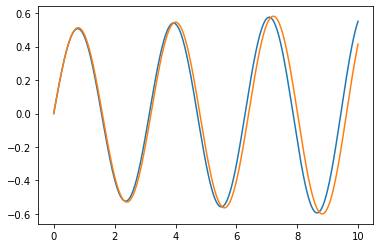

In [18]:
x2,t2=euler(0,1,2,nsteps=1000)
plt.plot(t,x)

x,t=euler(0,1,2,nsteps=1000)
plt.plot(t,x)